In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
sns.set_style('darkgrid')

In [3]:
## load the data
df_cases = pd.read_pickle('./corona_scotland_regions_ts.pk')
df_total = pd.read_pickle('./corona_scotland_total_stats.pk')
df_pop = pd.read_pickle('./scotland_population.pk')

In [4]:
# reset indices
df_cases = df_cases.reset_index(drop=True)
df_total = df_total.reset_index(drop=True)

In [5]:
df_cases.tail(15)

Health Board,Ayrshire and Arran,Borders,Dumfries and Galloway,Eileanan Siar (Western Isles),Fife,Forth Valley,Grampian,Greater Glasgow and Clyde,Highland,Lanarkshire,Lothian,Orkney,Shetland,Tayside,Scotland (Total)
44,586,237,229,6,532,509,464,1949,197,1022,1344,5,51,1056,8187.0
45,604,239,231,6,542,542,490,2020,198,1051,1399,6,51,1071,8450.0
46,623,240,231,6,561,562,519,2085,201,1076,1426,6,52,1084,8672.0
47,640,243,235,6,593,569,550,2174,211,1118,1515,6,54,1124,9038.0
48,653,248,235,6,619,604,602,2250,214,1155,1604,6,54,1159,9409.0
49,678,253,235,6,637,606,638,2311,214,1176,1684,6,54,1199,9697.0
50,692,258,237,6,653,655,700,2428,220,1187,1730,7,54,1224,10051.0
51,705,259,240,6,672,662,748,2479,225,1231,1785,7,54,1251,10324.0
52,721,269,243,6,681,680,771,2531,228,1265,1804,7,54,1261,10521.0
53,738,272,243,6,692,689,782,2604,232,1297,1832,7,54,1273,10721.0


In [6]:
current_day = df_cases.index[-1]
print("### Time Since Last Doubling ###")
for col in df_cases.columns:
    time_at_half = df_cases[df_cases[col] < (df_cases[col].iloc[-1]/2)].index[-1]
    time_since_doubling = current_day - time_at_half
    
    print(f'{col} : {time_since_doubling} days')

### Time Since Last Doubling ###
Ayrshire and Arran : 20 days
Borders : 27 days
Dumfries and Galloway : 30 days
Eileanan Siar (Western Isles) : 33 days
Fife : 20 days
Forth Valley : 18 days
Grampian : 15 days
Greater Glasgow and Clyde : 20 days
Highland : 22 days
Lanarkshire : 22 days
Lothian : 18 days
Orkney : 30 days
Shetland : 37 days
Tayside : 24 days
Scotland (Total) : 21 days


In [7]:
df_total.tail(10)

,Total Tests,Total Positive Cases,Total Deaths
49,46089,9697,1184
50,47749,10051,1231
51,49157,10324,1249
52,50294,10521,1262
53,51499,10721,1332
54,53082,11034,1415
55,54639,11353,1475
56,56702,11654,1515
57,58833,11927,1559
58,60295,12097,1571


## National Statistics

### total number of cases over time

In [43]:
roll = 7

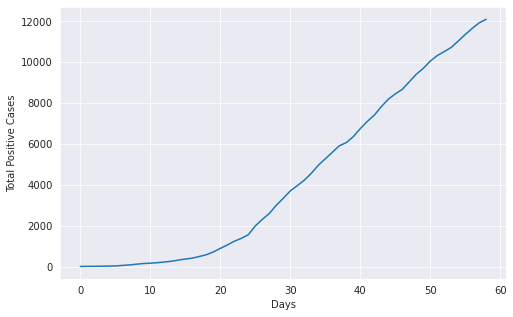

In [8]:
df_total['Total Positive Cases'].plot(figsize=(8, 5))
plt.ylabel('Total Positive Cases')
plt.xlabel('Days')
plt.show()

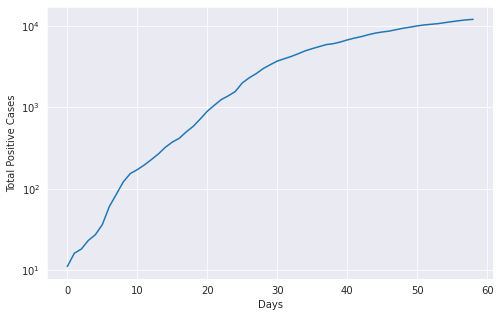

In [9]:
## same but with log y axis
df_total['Total Positive Cases'].plot(logy=True, figsize=(8, 5))
plt.ylabel('Total Positive Cases')
plt.xlabel('Days')
plt.show()

### Total Number of Tests Over Time

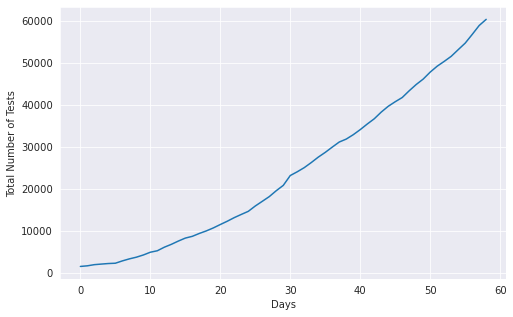

In [10]:
df_total['Total Tests'].plot(figsize=(8, 5))
plt.ylabel('Total Number of Tests')
plt.xlabel('Days')
plt.show()

In [11]:
num_test_per_day = df_total['Total Tests'].diff()
num_test_per_day.loc[0] = df_total['Total Tests'].loc[0]

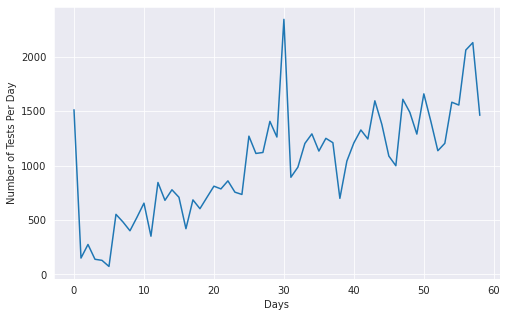

In [12]:
num_test_per_day.plot(figsize=(8, 5))
plt.ylabel('Number of Tests Per Day')
plt.xlabel('Days')
plt.show()

### Total number of deaths over time

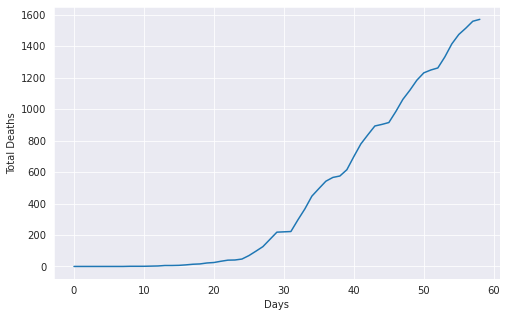

In [13]:
df_total['Total Deaths'].plot(figsize=(8, 5))
plt.ylabel('Total Deaths')
plt.xlabel('Days')
plt.show()

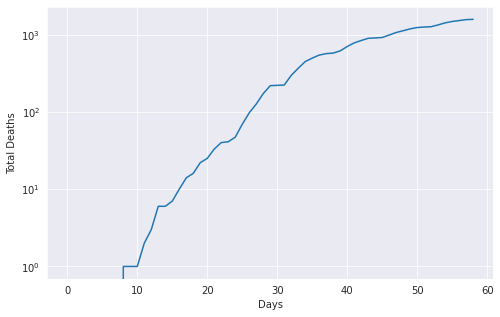

In [14]:
df_total['Total Deaths'].plot(logy=True, figsize=(8, 5))
plt.ylabel('Total Deaths')
plt.xlabel('Days')
plt.show()

### What is the Delay Between Recorded Cases and Deaths?

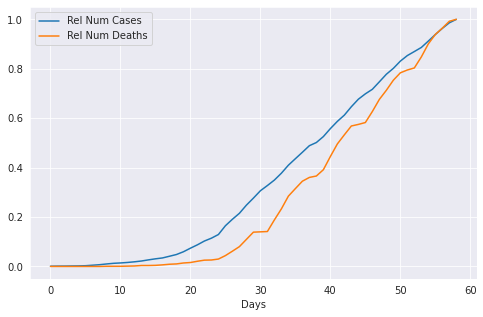

In [15]:
rel_cases = (df_total['Total Positive Cases'] / df_total['Total Positive Cases'].max())
rel_deaths = (df_total['Total Deaths'] / df_total['Total Deaths'].max())

rel_cases.plot(label='Rel Num Cases', figsize=(8, 5))
rel_deaths.plot(label='Rel Num Deaths')

plt.xlabel('Days')
plt.legend()
plt.show()

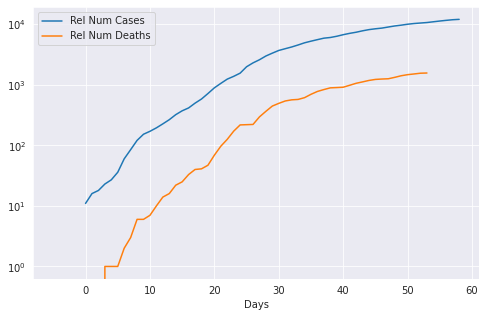

In [16]:
rel_cases = df_total['Total Positive Cases'].copy()
rel_deaths = df_total['Total Deaths'].copy()

# subtract some time off of deaths
rel_deaths.index = rel_deaths.index - 5

rel_cases.plot(logy=True, label='Rel Num Cases', figsize=(8, 5))
rel_deaths.plot(logy=True, label='Rel Num Deaths')

plt.xlabel('Days')
plt.legend()
plt.show()

- Deaths are perhaps roughly 5-10 days behind cases using this hand-wavy plot argument.

### What is the day-on-day change in number of cases?

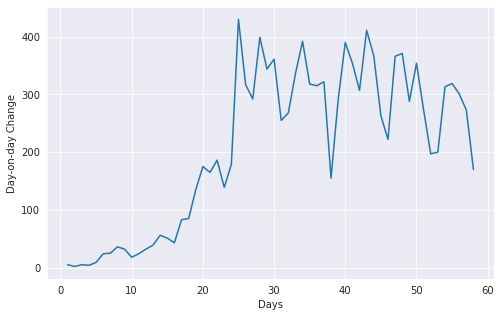

In [52]:
df_total['Total Positive Cases'].diff().dropna().plot(figsize=(8, 5))
plt.ylabel('Day-on-day Change')
plt.xlabel('Days')
plt.show()

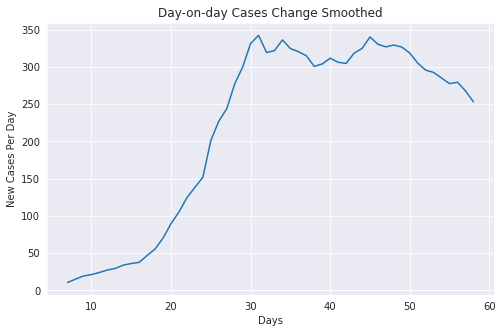

In [55]:
df_total['Total Positive Cases'].diff().dropna().rolling(roll).mean().plot(figsize=(8, 5))
plt.ylabel('New Cases Per Day')
plt.xlabel('Days')
plt.title('Day-on-day Cases Change Smoothed')
plt.show()

### What is the day-on-day percentage rise in cases?

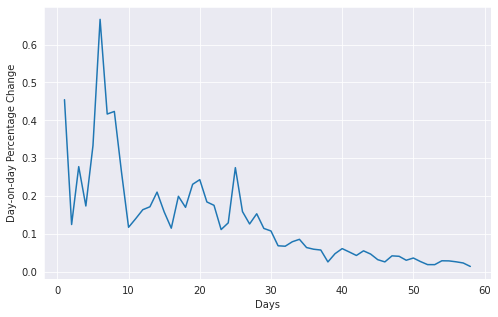

In [17]:
df_total['Total Positive Cases'].pct_change().plot(figsize=(8, 5))
plt.ylabel('Day-on-day Percentage Change')
plt.xlabel('Days')
plt.show()

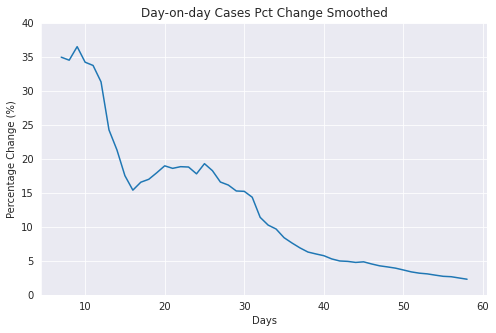

In [44]:
df_total['Total Positive Cases'].pct_change().rolling(roll).mean().mul(100).plot(figsize=(8, 5))
plt.ylabel('Percentage Change (%)')
plt.xlabel('Days')
plt.yticks(np.arange(0, 45, 5))
plt.title('Day-on-day Cases Pct Change Smoothed')
plt.show()

In [19]:
df_total['Total Positive Cases'].pct_change()[-7:]

52    0.019082
53    0.019010
54    0.029195
55    0.028911
56    0.026513
57    0.023425
58    0.014253
Name: Total Positive Cases, dtype: float64

In [20]:
df_total['Total Positive Cases'].pct_change().describe()

count    58.000000
mean      0.134642
std       0.127935
min       0.014253
25%       0.042460
50%       0.109784
75%       0.173386
max       0.666667
Name: Total Positive Cases, dtype: float64

In [21]:
df_cases.pct_change()[-10:]

Health Board,Ayrshire and Arran,Borders,Dumfries and Galloway,Eileanan Siar (Western Isles),Fife,Forth Valley,Grampian,Greater Glasgow and Clyde,Highland,Lanarkshire,Lothian,Orkney,Shetland,Tayside,Scotland (Total)
49,0.038285,0.020161,0.000000,0.0,0.029079,0.003311,0.059801,0.027111,0.000000,0.018182,0.049875,0.000000,0.0,0.034513,0.030609
50,0.020649,0.019763,0.008511,0.0,0.025118,0.080858,0.097179,0.050627,0.028037,0.009354,0.027316,0.166667,0.0,0.020851,0.036506
51,0.018786,0.003876,0.012658,0.0,0.029096,0.010687,0.068571,0.021005,0.022727,0.037068,0.031792,0.000000,0.0,0.022059,0.027161
52,0.022695,0.038610,0.012500,0.0,0.013393,0.027190,0.030749,0.020976,0.013333,0.027620,0.010644,0.000000,0.0,0.007994,0.019082
53,0.023578,0.011152,0.000000,0.0,0.016153,0.013235,0.014267,0.028842,0.017544,0.025296,0.015521,0.000000,0.0,0.009516,0.019010
54,0.009485,0.025735,0.004115,0.0,0.028902,0.040639,0.039642,0.026114,0.017241,0.024672,0.040939,0.000000,0.0,0.031422,0.029195
55,0.022819,0.000000,0.008197,0.0,0.035112,0.009763,0.025830,0.032560,0.025424,0.033860,0.038280,0.000000,0.0,0.027418,0.028911
56,0.020997,0.007168,0.012195,0.0,0.017639,0.031768,0.038369,0.038057,0.070248,0.018923,0.017172,0.000000,0.0,0.022239,0.026513
57,0.019280,0.007117,0.004016,0.0,0.024000,0.013387,0.026559,0.026187,0.111969,0.025714,0.025323,0.000000,0.0,0.009427,0.023425
58,0.007566,0.003534,0.000000,0.0,0.010417,0.040951,0.010124,0.015652,0.031250,0.012535,0.011622,0.000000,0.0,0.012931,0.014253


In [46]:
df_cases.pct_change().rolling(roll).mean()[-10:]

Health Board,Ayrshire and Arran,Borders,Dumfries and Galloway,Eileanan Siar (Western Isles),Fife,Forth Valley,Grampian,Greater Glasgow and Clyde,Highland,Lanarkshire,Lothian,Orkney,Shetland,Tayside,Scotland (Total)
49,0.034180,0.014367,0.017112,0.0,0.038874,0.050574,0.071402,0.036905,0.019573,0.033560,0.053310,0.028571,0.027343,0.029441,0.039238
50,0.030734,0.015942,0.009442,0.0,0.034851,0.055496,0.071507,0.035298,0.018994,0.025566,0.049045,0.052381,0.027343,0.026145,0.036528
51,0.026785,0.012786,0.006746,0.0,0.034005,0.038651,0.070721,0.034999,0.019280,0.026985,0.041480,0.052381,0.008296,0.024543,0.033704
52,0.025639,0.017096,0.007284,0.0,0.033232,0.033273,0.067108,0.032792,0.020460,0.026877,0.037155,0.023810,0.008296,0.023656,0.031841
53,0.024513,0.018091,0.007284,0.0,0.030532,0.029893,0.060692,0.032315,0.020802,0.027093,0.036615,0.023810,0.005495,0.023282,0.030803
54,0.021970,0.019982,0.005398,0.0,0.026512,0.033919,0.057822,0.029948,0.016157,0.025041,0.033548,0.023810,0.000000,0.022499,0.028945
55,0.022328,0.017043,0.006569,0.0,0.025265,0.026526,0.048006,0.029605,0.017758,0.025150,0.030624,0.023810,0.000000,0.021967,0.027211
56,0.019859,0.015186,0.008311,0.0,0.023630,0.030591,0.044944,0.031169,0.027794,0.025256,0.025952,0.023810,0.000000,0.020214,0.026625
57,0.019663,0.013380,0.007669,0.0,0.023471,0.020953,0.034855,0.027677,0.039784,0.027593,0.025667,0.000000,0.000000,0.018582,0.024757
58,0.018060,0.013331,0.005860,0.0,0.020802,0.025276,0.026506,0.026913,0.041001,0.024089,0.022786,0.000000,0.000000,0.017278,0.022913


### What is the day-on-day percentage rise in deaths?

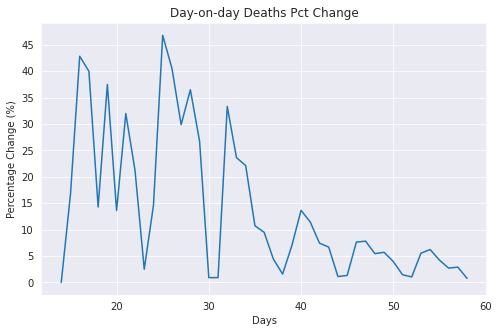

In [47]:
# remove first 13 points because they have nothing
death_pct_change = df_total['Total Deaths'].iloc[13:].pct_change()
death_pct_change.mul(100).plot(figsize=(8, 5))
plt.yticks(np.arange(0, 50, 5))
plt.title('Day-on-day Deaths Pct Change')
plt.ylabel('Percentage Change (%)')
plt.xlabel('Days')
plt.show()

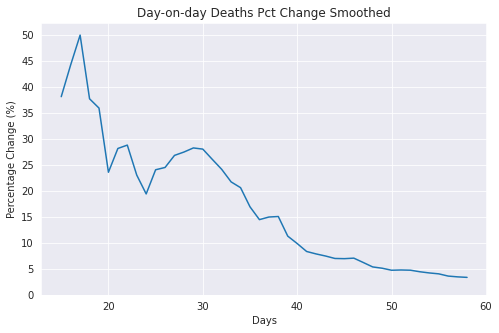

In [48]:
# remove first 13 points because they have nothing
death_pct_change = df_total['Total Deaths'].pct_change()
death_pct_change.rolling(roll).mean().mul(100).plot(figsize=(8, 5))
plt.yticks(np.arange(0, 55, 5))
plt.title('Day-on-day Deaths Pct Change Smoothed')
plt.ylabel('Percentage Change (%)')
plt.xlabel('Days')
plt.show()

In [25]:
death_pct_change[-10:]

49    0.057143
50    0.039696
51    0.014622
52    0.010408
53    0.055468
54    0.062312
55    0.042403
56    0.027119
57    0.029043
58    0.007697
Name: Total Deaths, dtype: float64

In [26]:
death_pct_change.describe()

count    51.000000
mean           inf
std            NaN
min       0.000000
25%       0.028081
50%       0.078173
75%       0.283205
max            inf
Name: Total Deaths, dtype: float64

### What is the Proportion of Positive Tests?

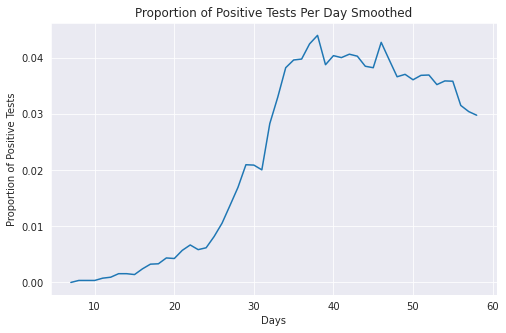

In [51]:
prop_pos = (df_total['Total Deaths'].diff() / df_total['Total Tests'].diff()).rolling(roll).mean().dropna()

prop_pos.plot(figsize=(8, 5))
plt.title('Proportion of Positive Tests Per Day Smoothed')
plt.ylabel('Proportion of Positive Tests')
plt.xlabel('Days')
plt.show()

### What is the Day-on-day rise in deaths?

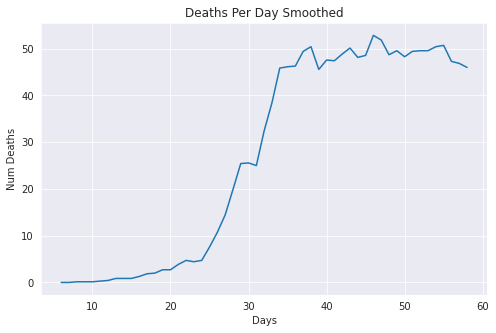

In [49]:
# remove first 13 points because they have nothing
death_per_day = df_total['Total Deaths'].diff().fillna(0)
death_per_day.rolling(roll).mean().plot(figsize=(8, 5))
plt.title('Deaths Per Day Smoothed')
plt.ylabel('Num Deaths')
plt.xlabel('Days')
plt.show()

## Regional Statistics

### Num Cases Per Region

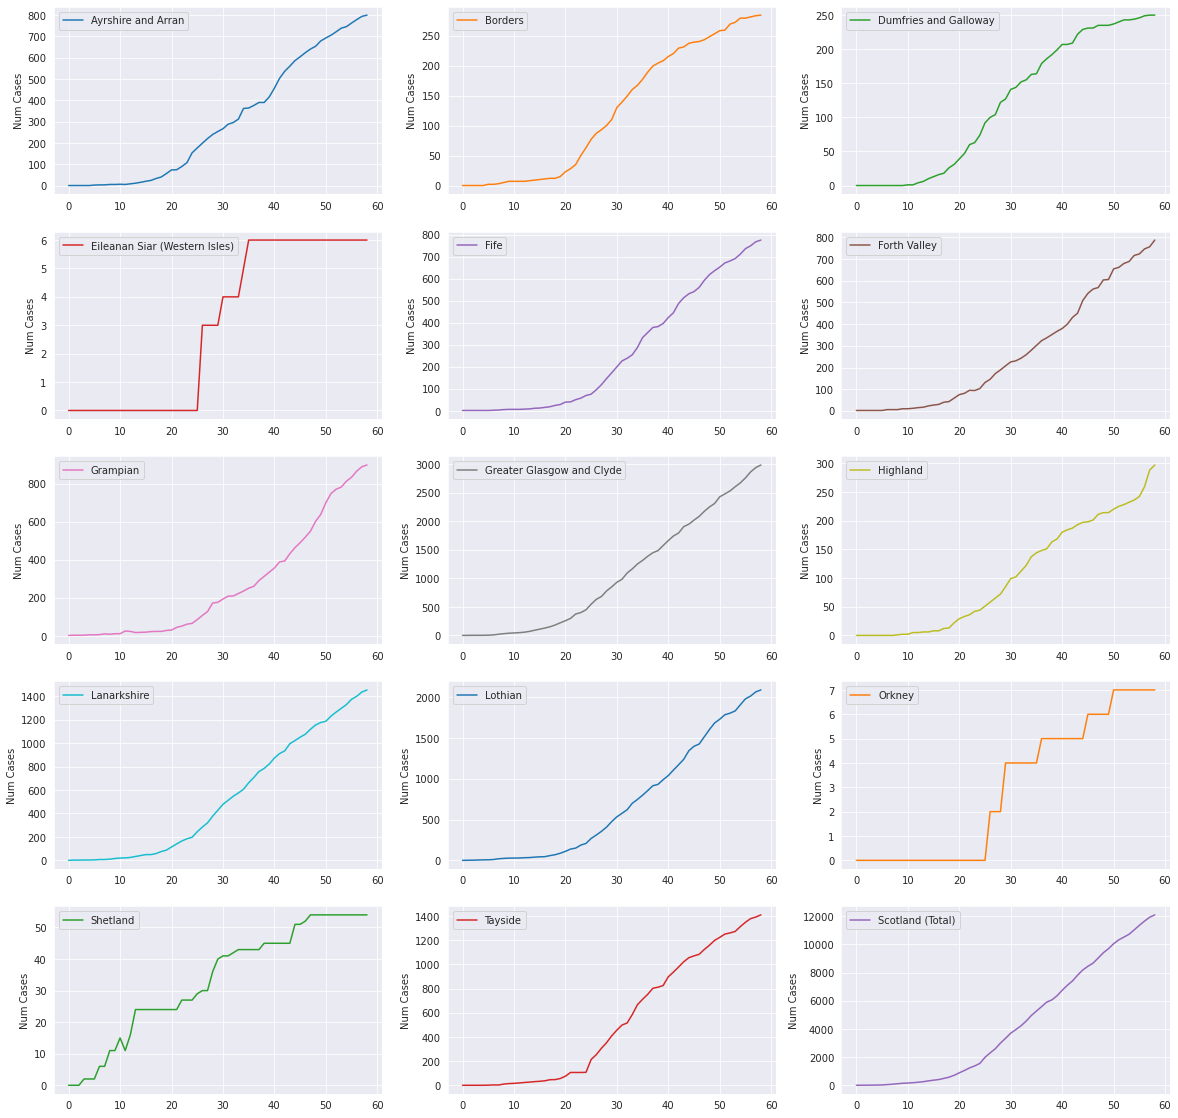

In [29]:
axes = df_cases.plot(subplots=True, layout=(5, 3), figsize=(20, 20), sharex=False)
for ax in axes.flatten():
    ax.set_ylabel('Num Cases')
plt.show()

- Same again, but sharing the y axis for comparison, omitting the total so we can compare regions

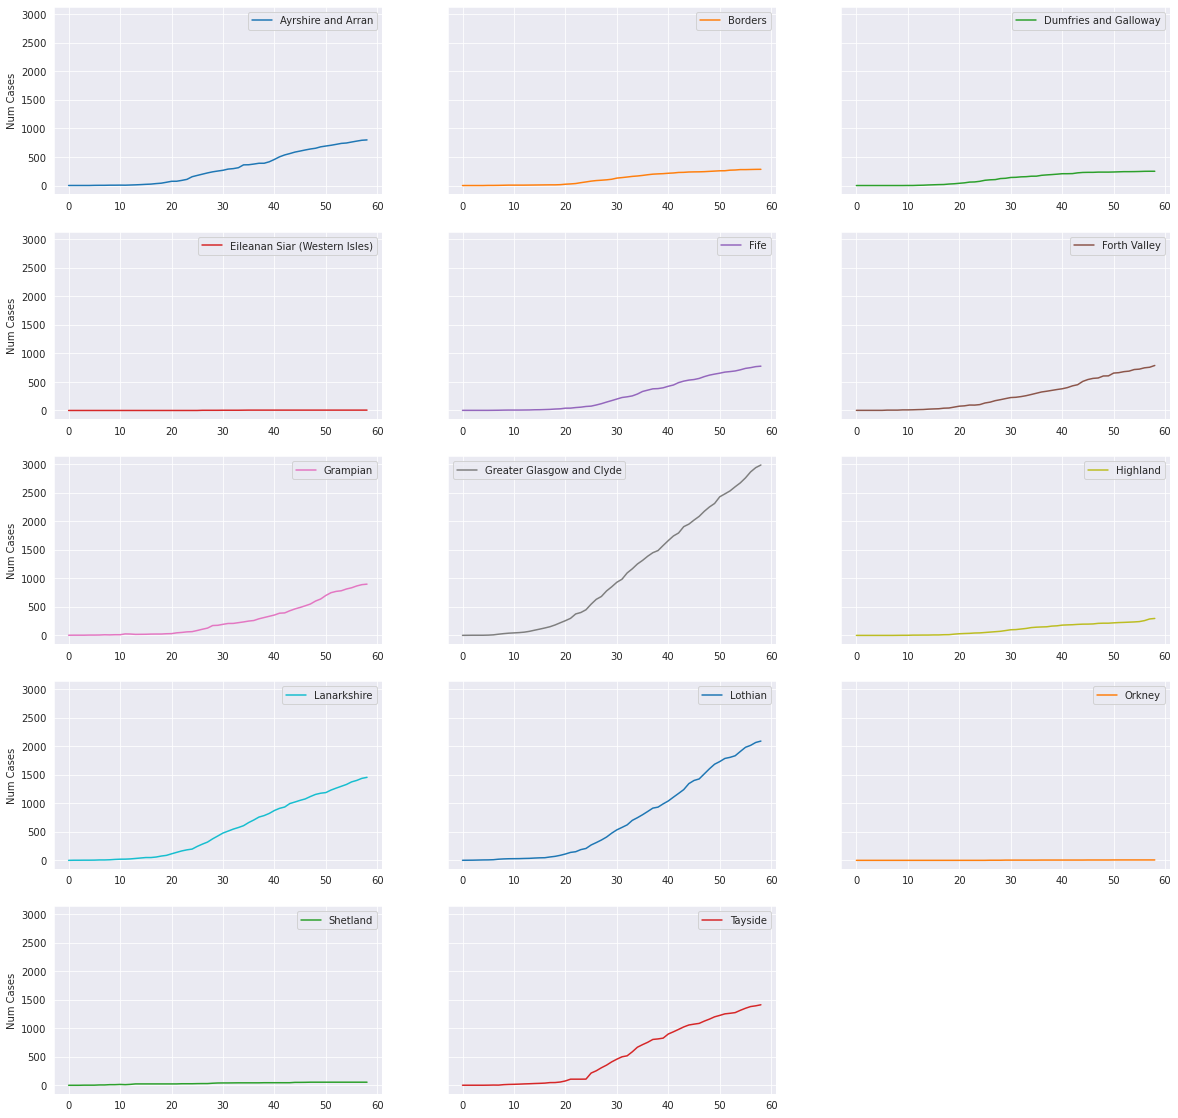

In [30]:
axes = df_cases.drop(columns='Scotland (Total)').plot(subplots=True, layout=(5, 3), figsize=(20, 20), sharey=True, sharex=False)
for ax in axes.flatten():
    ax.set_ylabel('Num Cases')
plt.show()

### Num Cases Per Capita Per Region

In [31]:
194 / 178

1.0898876404494382

In [32]:
## make sure columns are in the right order
assert all(df_cases.columns == df_pop.index)

In [33]:
df_cases_rel = df_cases / df_pop.values.T * 100000

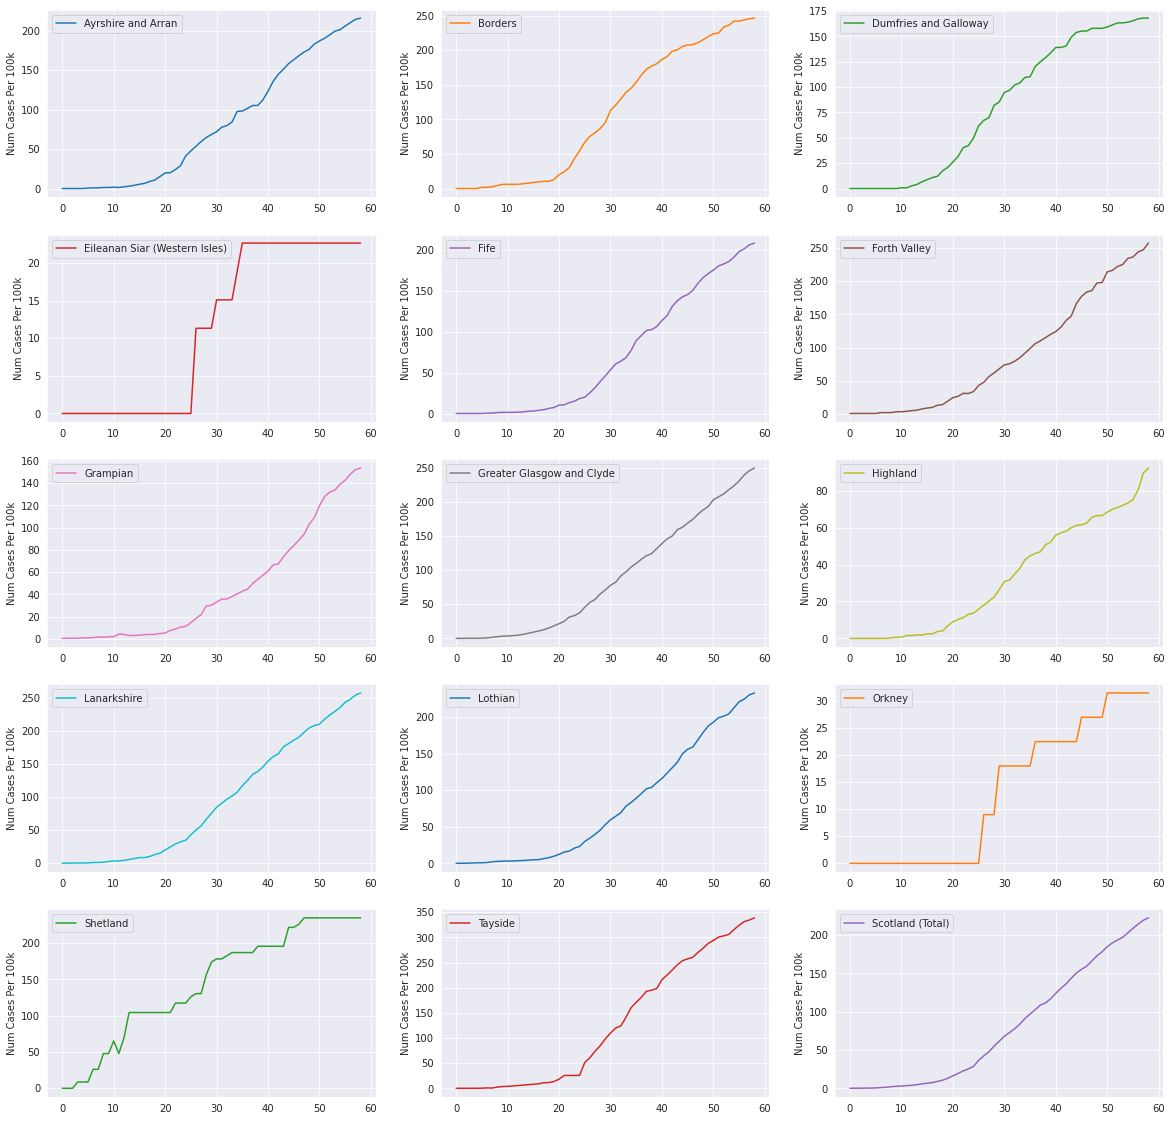

In [34]:
axes = df_cases_rel.plot(subplots=True, layout=(5, 3), figsize=(20, 20), sharex=False)
for ax in axes.flatten():
    ax.set_ylabel('Num Cases Per 100k')
plt.show()

- Same again but sharing the y axis for comparison

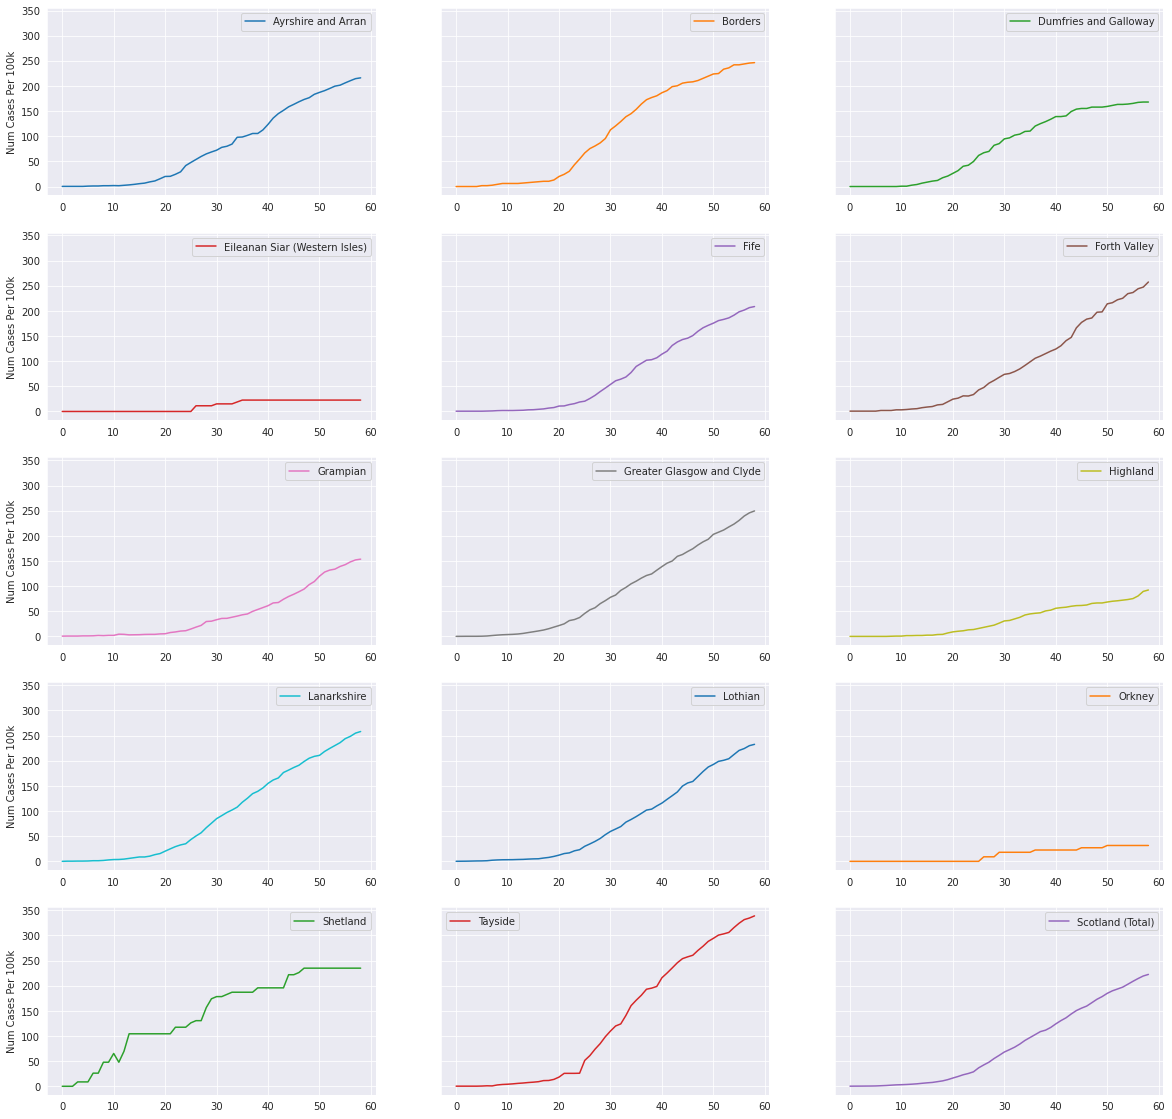

In [35]:
axes = df_cases_rel.plot(subplots=True, layout=(5, 3), figsize=(20, 20), sharey=True, sharex=False)
for ax in axes.flatten():
    ax.set_ylabel('Num Cases Per 100k')
plt.show()

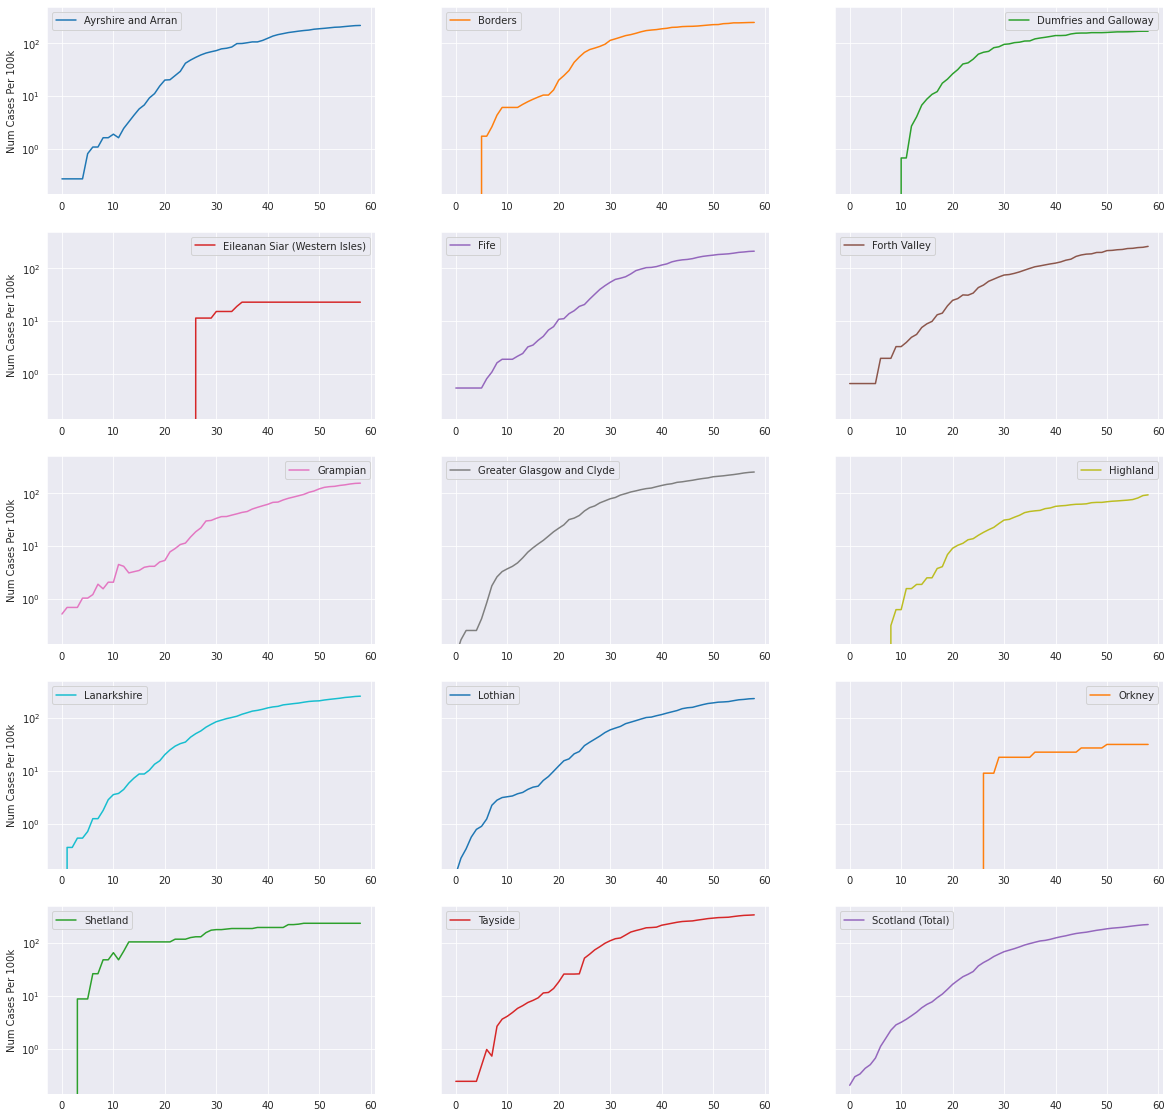

In [36]:
axes = df_cases_rel.plot(subplots=True, layout=(5, 3), figsize=(20, 20), sharey=True, sharex=False, logy=True)
for ax in axes.flatten():
    ax.set_ylabel('Num Cases Per 100k')
plt.show()

### Day-on-day Num Cases

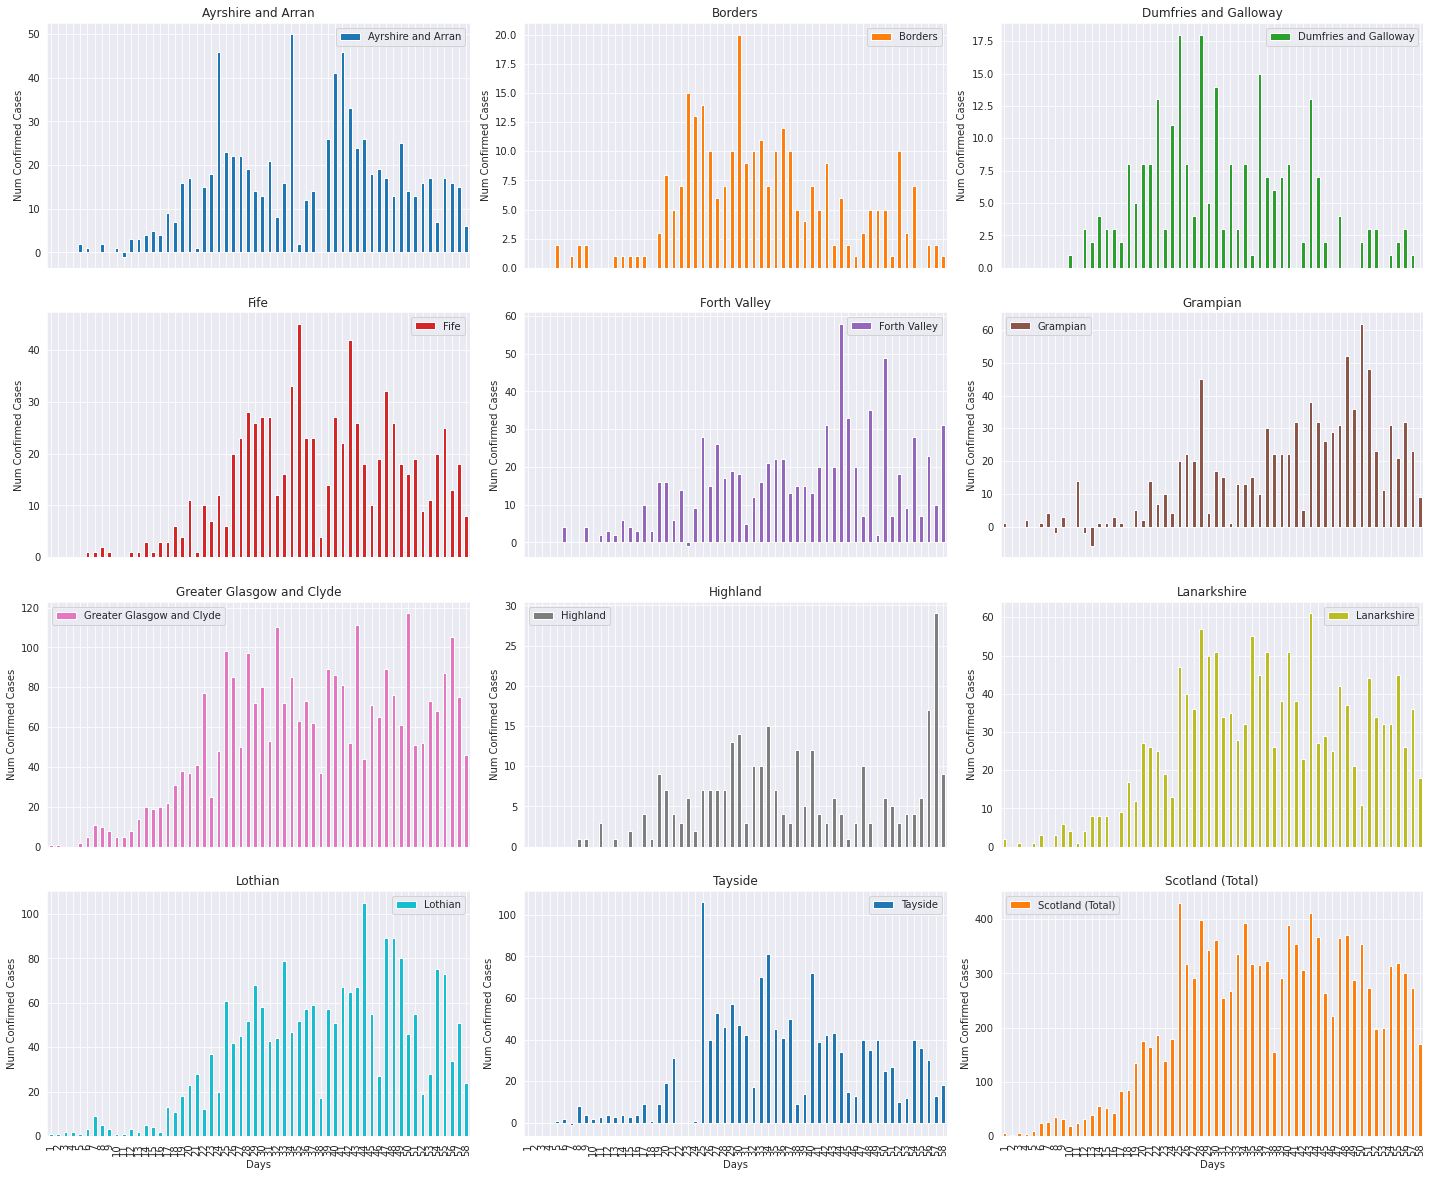

In [37]:
diff_cases = df_cases.drop(columns=['Orkney', 'Eileanan Siar (Western Isles)', 'Shetland']).diff().dropna()#.rolling(3).mean()
axes = diff_cases.plot.bar(subplots=True, figsize=(20,20), layout=(5, 3))
for ax in axes.flatten(): 
    ax.set_ylabel('Num Confirmed Cases')
    ax.set_xlabel('Days')
plt.tight_layout()
plt.show()

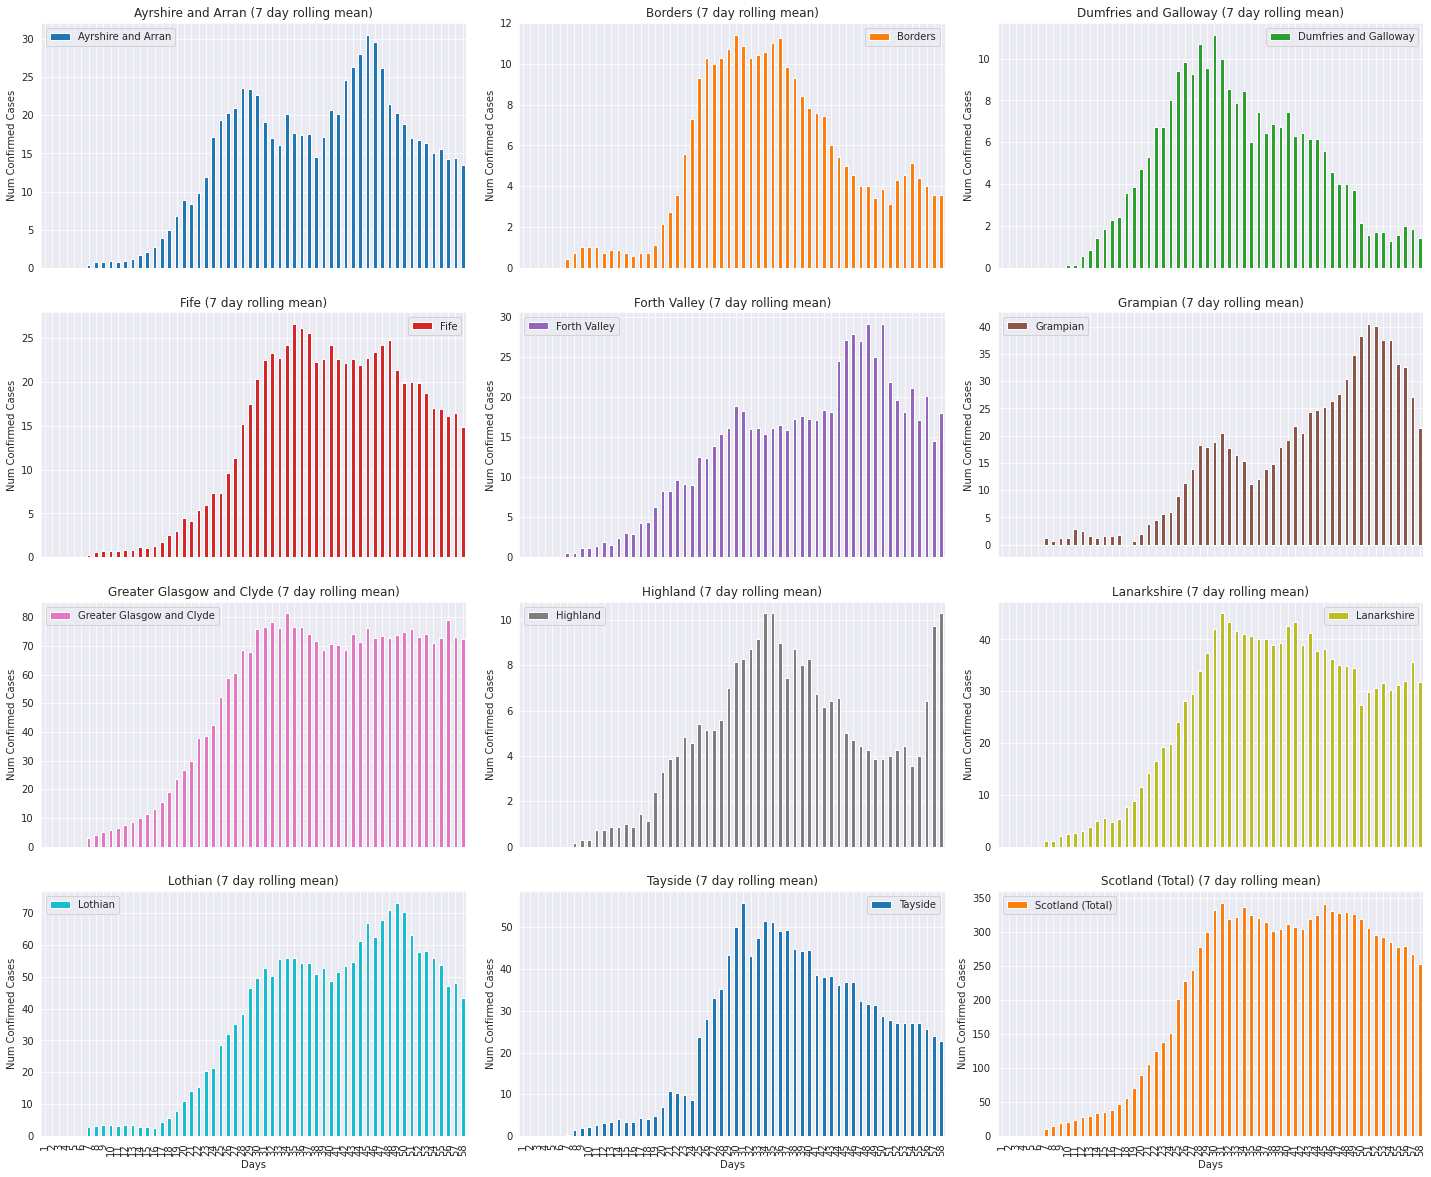

In [57]:
diff_cases = df_cases.drop(columns=['Orkney', 'Eileanan Siar (Western Isles)', 'Shetland']).diff().dropna().rolling(roll).mean()
axes = diff_cases.plot.bar(subplots=True, figsize=(20,20), layout=(5, 3))
for ax in axes.flatten(): 
    ax.set_ylabel('Num Confirmed Cases')
    ax.set_xlabel('Days')
    ax.set_title(ax.get_title() + f' ({roll} day rolling mean)')
plt.tight_layout()
plt.show()

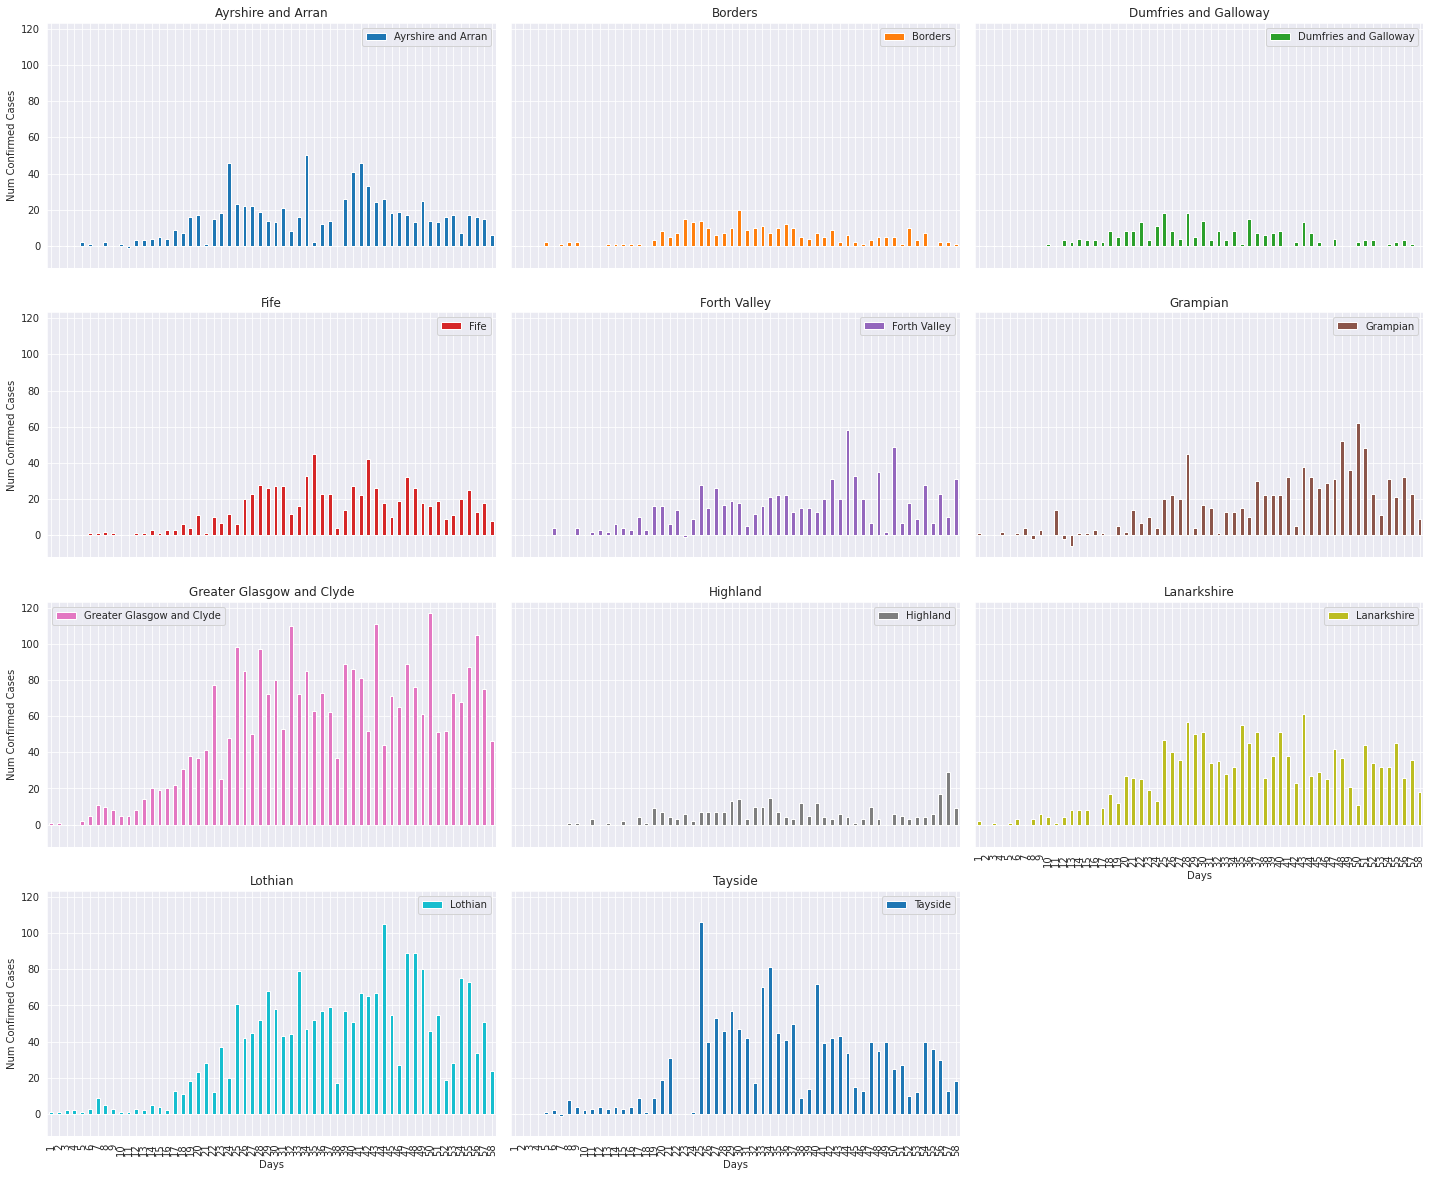

In [39]:
diff_cases = df_cases.drop(columns=['Scotland (Total)', 'Orkney', 'Eileanan Siar (Western Isles)', 'Shetland']).diff().dropna()#.rolling(3).mean()
axes = diff_cases.plot.bar(subplots=True, figsize=(20,20), sharey=True, layout=(5, 3))
for ax in axes.flatten(): 
    ax.set_ylabel('Num Confirmed Cases')
    ax.set_xlabel('Days')
plt.tight_layout()
plt.show()

In [40]:
df_cases.columns

Index(['Ayrshire and Arran', 'Borders', 'Dumfries and Galloway',
       'Eileanan Siar (Western Isles)', 'Fife', 'Forth Valley', 'Grampian',
       'Greater Glasgow and Clyde', 'Highland', 'Lanarkshire', 'Lothian',
       'Orkney', 'Shetland', 'Tayside', 'Scotland (Total)'],
      dtype='object', name='Health Board')

### Log Growth Curves for Each Region

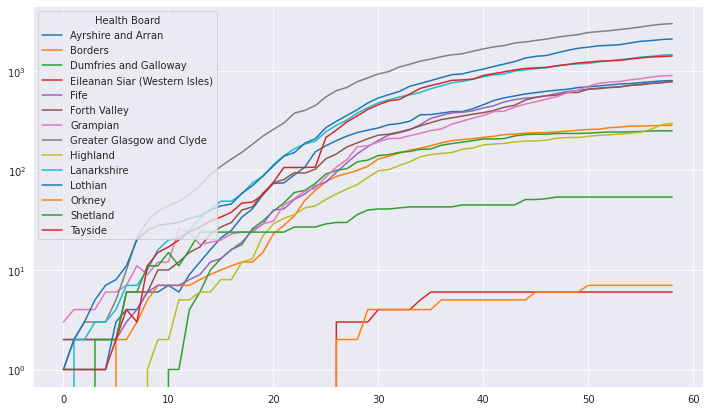

In [41]:
df_cases.drop(columns='Scotland (Total)').plot(logy=True, figsize=(12, 7))
plt.show()

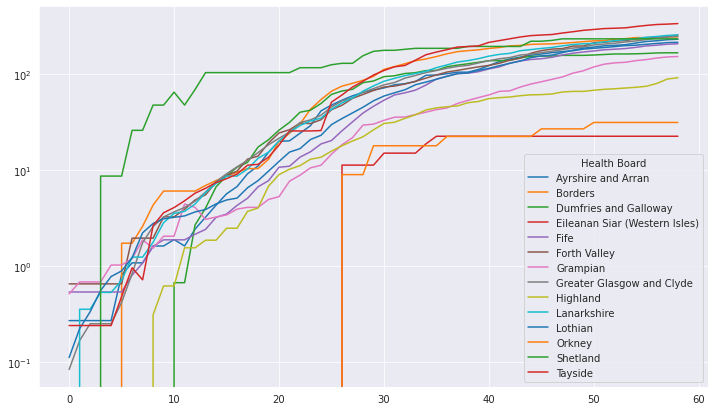

In [42]:
df_cases_rel.drop(columns='Scotland (Total)').plot(logy=True, figsize=(12, 7))
plt.show()